# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Описание данных

Набор данных находится в файле /datasets/insurance.csv.
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

Импортирую необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Открою файл и изучу его

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
df.nunique()

Пол                    2
Возраст               46
Зарплата             524
Члены семьи            7
Страховые выплаты      6
dtype: int64

Теперь рассмотрю распределение признаков, отдельно разделю признаки на категориальные и количественные.

In [25]:
categorical = df[['Пол','Члены семьи','Страховые выплаты']]

In [26]:
quantitative = df[['Возраст','Зарплата']]

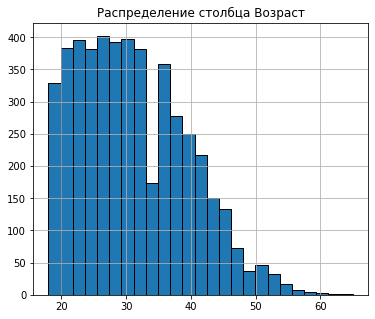

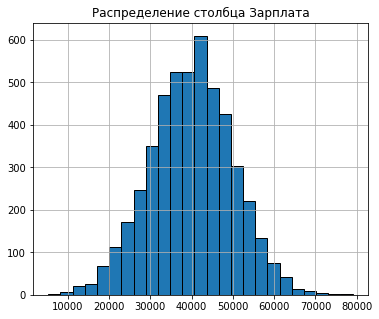

In [30]:
for column in quantitative.columns:
    plt.figure(figsize=(6,5))
    quantitative[column].hist(bins=25, edgecolor='k')
    plt.title(f'Распределение столбца {column}')
    plt.show()

Глядя на гистограммы количественных переменных, выбивающихся значений не обнаружено.

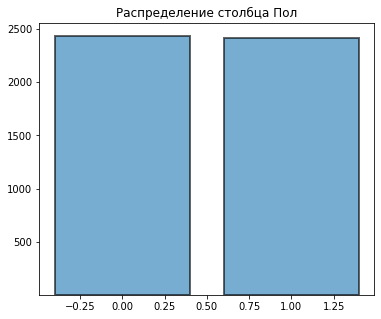

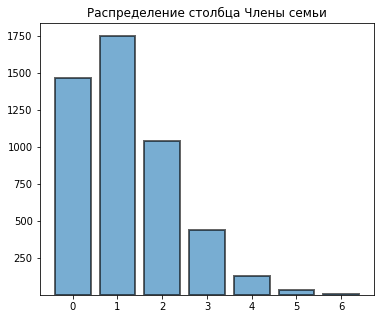

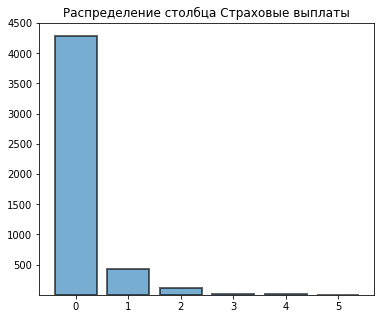

In [42]:
for column in categorical.columns:
    x = categorical.groupby(column)[column].count().index.tolist()
    y = categorical.groupby(column)[column].count().tolist()
    plt.figure(figsize=(6,5))
    plt.bar(x, y, alpha=0.6, bottom=2, edgecolor="k", linewidth=2, align='center')
    plt.title(f'Распределение столбца {column}')
    plt.show()
    

На столбчатых графиках категориальных переменных тоже не замечено выбивающихся значений.

In [9]:
df.duplicated().sum()

153

В таблице обнаружены явные дубликаты. Удалю их, так как врятли могут быть совпадения по всем признакам. А также изменю тип данных в колонках `Возраст` и `Зарплата` на целочисленный.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


**Вывод:**

Были рассмотрены данные в таблице и выявлено, что:

- Нет выбивающихся значений
- Отсутствуют пропуски
- Колонки с возрастом и зарплатой приведены к целочисленному значению
- Выявлены и удалены явные дубликаты

Можно сделать вывод, что данные хорошо подготовлены.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ — единичная матрица

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** 

Для преобразования необходимы следующие свойства матриц:

 - $(XP)^T = P^T X^T$
 - $(XP)^{-1} = P^{-1} X^{-1}$
 - $XX^{-1} = E$
 
Произведу умножение матрицы признаков на обратимую матрицу Р. Так как матрица Р-обратимая, это говорит о том, что она квадратная:

$$
w` = ((XP)^T XP)^{-1} (XP)^T y
$$

Далее раскрою скобки $(XP)^T$ в соответствии со свойствами матриц:

$$
w` = (P^T X^T XP)^{-1} P^T X^T y 
$$

Перегруппирую множители в скобках:

$$
w` = (P^T (X^T X) P)^{-1} P^T X^T y 
$$

Теперь раскрою скобки $(P^T (X^T X) P)^{-1}$:

$$
w` = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$

Так как P - квадратная матрица, то при перемножении $(P^T)^{-1} P^T$ матрица будет равняться единичной, следовательно уравнение сокращается и в $w`$ можно подставить $w$:

$$
w` = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Теперь поставлю в формулу предсказания новое значение $w`$ для того чтобы вычислить предсказания $а`$:

$$
a` = XP P^{-1} w
$$

Произведение $P P^{-1}$ бобразует единичную матрицу, следовательно:

$$
a` = Xw = а
$$

**Вывод:**

При умножении признаков на обратимую матрицу качество линейной регрессии не изменится, так как $a` = а$.

## Алгоритм преобразования

**Алгоритм**

Для преобразования данных с целью защиты данных клиентов применю алгоритм шифрования признаков в виде умножения на случайную обратимую матрицу.

1. Разделю данные на признаки и целевой признак.
2. Разделю данные на обучающую и тестовую выборки.
3. Создам случайную квадратную матрицу $P$ размером $n \times n$ и проверю ее на обратимость (её детерминант должен быть отличен от нуля).
4. Произведу умножение матрицы признаков $X$ размером $m \times n$ со случайной матрицей $P$ размером $n \times n$ и получу новую зашифрованную таблицу размером $m \times n$.
5. Проведу обучение исходной и зашифрованной таблицы.
6. Проверю качество линейной регрессии до шифрования и после с помощью применения метрики R2.


**Обоснование**

В пункте 2 было доказано, что при умножении признаков на обратимую матрицу, качество линейной регрессии не меняется. В таком случае, преобразовать данные можно с помощью произведения признаков и обратимой матрицы.

## Проверка алгоритма

Разделю данные на признаки

In [13]:
features = df.drop('Страховые выплаты', axis = 1)
target = df['Страховые выплаты']

Теперь создам случайную матрицу $P$ и проверю ее на обратимость.

In [14]:
P = np.random.randint(100,size = (4, 4))
P

array([[82, 95, 98, 71],
       [98, 17, 48, 24],
       [25, 56, 83, 66],
       [10, 13, 70, 73]])

In [15]:
np.linalg.inv(P)

array([[ 0.0134829 ,  0.00472733, -0.02645539,  0.00925087],
       [ 0.02316165, -0.01494264, -0.01621242, -0.00295663],
       [-0.06290459,  0.02971326,  0.10853832, -0.0467181 ],
       [ 0.05434782, -0.02647873, -0.09756667,  0.05775609]])

Случайная матрица обратима. Теперь проведу умножение матрицы признаков со случайной матрицей и сохраню результат в новой таблице.

In [16]:
encoded_matrix = np.array(features) @ P
encoded_features = pd.DataFrame(encoded_matrix, columns=features.columns)
encoded_features

,Пол,Возраст,Зарплата,Члены семьи
0,1244110,2778405,4118936,3274728
1,954518,2128795,3156278,2509177
2,527842,1176493,1744392,1386696
3,1044578,2335583,3462248,2752850
4,655326,1462171,2167742,1723343
...,...,...,...,...
4842,895264,1999702,2964584,2357018
4843,1313342,2934991,4350902,3459289
4844,849480,1898766,2814800,2238026
4845,819768,1831708,2715464,2159018


Данные преобразованы. Теперь можно приступить к проверке качества линейной регрессии. Чтобы не дублировать код при проверке исходных и зашифрованных данных, создам функцию.

In [17]:
def check_model(features, target):
    
    train_features, test_features, train_target, test_target = train_test_split(features,
                                                                                target,
                                                                                test_size=0.25,
                                                                                random_state=12345)
    
    model = LinearRegression()
    model.fit(train_features, train_target)
    
    predicted = model.predict(test_features)
    
    score = r2_score(test_target, predicted)
    
    print('Метрика R2 на тестовой выборке:', score)

Для начала проверю метрику качества не зашифрованного датасета

In [18]:
check_model(features, target)

Метрика R2 на тестовой выборке: 0.42307727615837565


Теперь проверю метрику качества на зашифрованных данных. 

In [19]:
check_model(encoded_features, target)

Метрика R2 на тестовой выборке: 0.42307727615837254


**Вывод:**

Сравнение качества моделей до и после преобразования показало, что качество моделей не отличается.

# Общий вывод

Цель проекта достигнута - данные защищены без потери качества.

В ходе выполнения проекта, были выполнены следующие действия:
- загружены и изучены данные
- доказано, что при умножении матрицы признаков на обратимую матрицу, качество линейной регрессии не меняется
- предложен алгоритм преобразования данных для решения задачи
- выполнен предложенный алгоритм, с применением матричных операций
- произведена проверка качества линейной регрессии до и после преобразования с применением метрики R2.

Цель проекта достигнута - данные защищены без потери качества.